In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 


###  DADOS DE TRANSPORTE DE PASSAGEIROS - COLHIDOS NO SITE OFICIAL DA SPTRANS

sptrans_arquivo = (r"C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/02-SPTRANS_PASSAGEIROS_CHUVA/01-INPUT/SPTRANS.csv")

sptrans = pd.read_csv(sptrans_arquivo, encoding='ANSI', sep=";")

df_transporte = sptrans.iloc[:,[0,-1]]
df_transporte = df_transporte.rename(columns={"TOT PASSAGEIROS TRANSPORTADOS":"QTD_PASSAGEIROS"})
df_transporte['QTD_PASSAGEIROS'] = df_transporte['QTD_PASSAGEIROS'].astype(int)

print(df_transporte.info())
print("#############################")
print(df_transporte)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MÊS              96 non-null     object
 1   QTD_PASSAGEIROS  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#############################
       MÊS  QTD_PASSAGEIROS
0   dez/23        169344196
1   nov/23        169267045
2   out/23        179184034
3   set/23        176996200
4   ago/23        191273935
..     ...              ...
91  mai/15        247975278
92  abr/15        240925285
93  mar/15        258355557
94  fev/15        214836388
95  jan/15        217543645

[96 rows x 2 columns]


In [2]:
#########  DADOS DE CLIMA MÉDIO DO MÊS - COLHIDOS NO SITE OFICIAL DA PREFEITURA, SECRETARIA DE URBANISMO

caminho_df = (r"C:/Users/Guilh/OneDrive/Área de Trabalho/1-MATERIAIS DE ESTUDO/01 - DIVERSOS/02-SPTRANS_PASSAGEIROS_CHUVA/01-INPUT/CLIMA.csv")

clima = pd.read_csv(caminho_df, encoding='ANSI', sep=";")
df_clima = clima.iloc[0:4,[-1,-3]]
df_clima.loc[df_clima['NUM_ANO_MES'] == 202212, 'MÊS'] = 'dez/22'
df_clima.loc[df_clima['NUM_ANO_MES'] == 202301, 'MÊS'] = 'jan/23'
df_clima.loc[df_clima['NUM_ANO_MES'] == 202302, 'MÊS'] = 'fev/23'
df_clima.loc[df_clima['NUM_ANO_MES'] == 202303, 'MÊS'] = 'mar/23'
df_clima = clima.iloc[:,[2,-3]]
df_clima = df_clima.rename(columns={"MÉDIA_MENSAL":"CLIMA_MEDIO"})
df_clima['CLIMA_MEDIO'] = df_clima['CLIMA_MEDIO'].astype(int)

print(df_clima.info())
print("#############################")
print(df_clima)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MÊS          96 non-null     object
 1   CLIMA_MEDIO  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#############################
       MÊS  CLIMA_MEDIO
0   dez/23           23
1   nov/23           22
2   out/23           20
3   set/23           21
4   ago/23           18
..     ...          ...
91  mai/15           18
92  abr/15           20
93  mar/15           21
94  fev/15           23
95  jan/15           24

[96 rows x 2 columns]


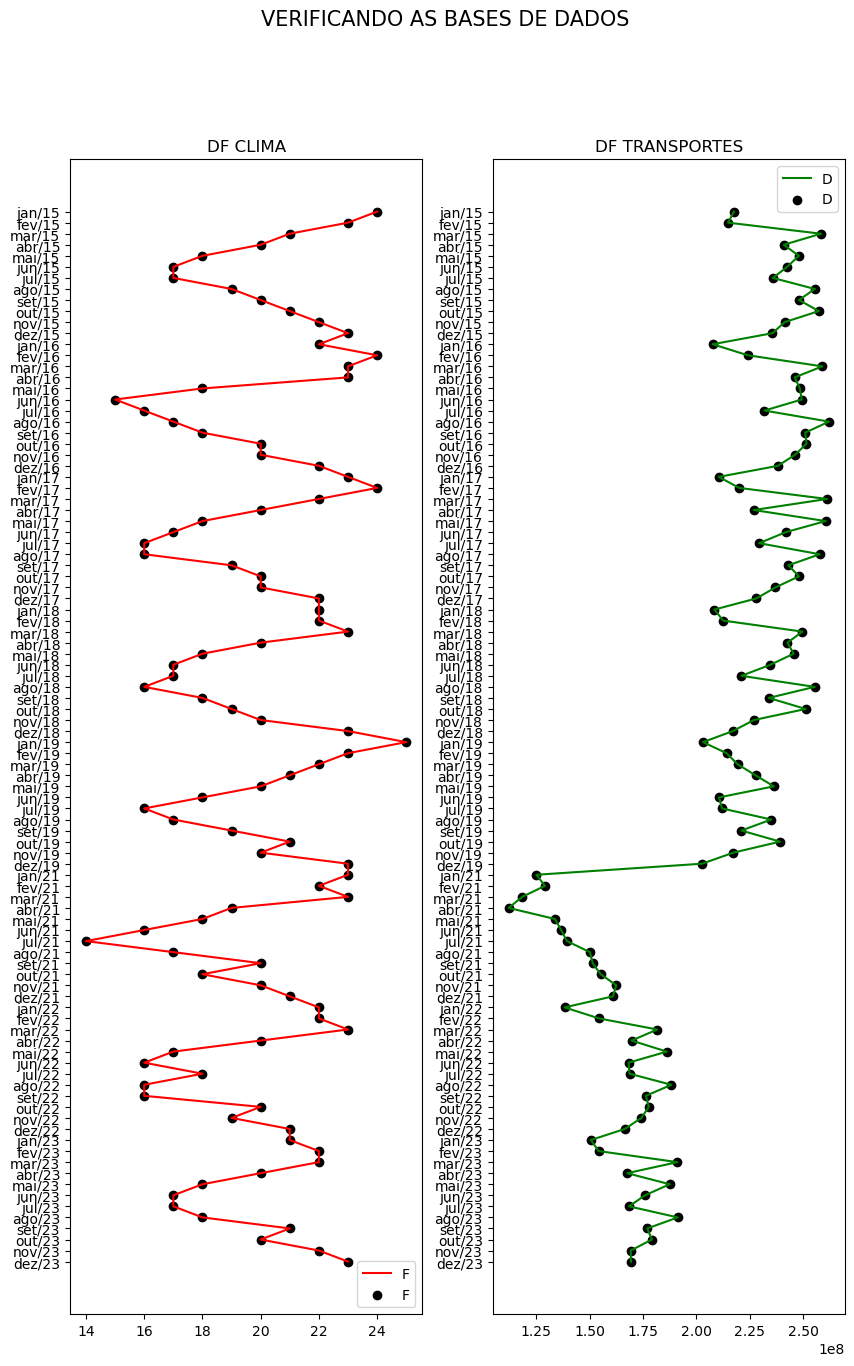

In [3]:
## VERIFICANDO O DATASET

figura= plt.figure(figsize=(10, 15))
figura.suptitle('VERIFICANDO AS BASES DE DADOS', fontsize=(15))

figura.add_subplot(121)
plt.plot(df_clima.CLIMA_MEDIO, df_clima.MÊS, label= "F", color='r')
plt.scatter(df_clima.CLIMA_MEDIO, df_clima.MÊS, label= "F", color='k')
plt.legend(loc=4, fontsize=10)
plt.title('DF CLIMA')


figura.add_subplot(122)
plt.plot(df_transporte.QTD_PASSAGEIROS, df_transporte.MÊS, label='D', color='g')
plt.scatter(df_transporte.QTD_PASSAGEIROS, df_transporte.MÊS, label='D', color='k')
plt.legend(loc=1, fontsize=10)
plt.title('DF TRANSPORTES')

plt.show()

In [4]:
# COMBINANDO OS DATAFRAMES - INNER JOIN

df_objetivo =  pd.merge(df_transporte,df_clima, left_on = 'MÊS', right_on = 'MÊS', how = 'inner')
print(df_clima.info())
print("#############################")
print(df_objetivo)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MÊS          96 non-null     object
 1   CLIMA_MEDIO  96 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB
None
#############################
       MÊS  QTD_PASSAGEIROS  CLIMA_MEDIO
0   dez/23        169344196           23
1   nov/23        169267045           22
2   out/23        179184034           20
3   set/23        176996200           21
4   ago/23        191273935           18
..     ...              ...          ...
91  mai/15        247975278           18
92  abr/15        240925285           20
93  mar/15        258355557           21
94  fev/15        214836388           23
95  jan/15        217543645           24

[96 rows x 3 columns]


In [18]:
import statsmodels.formula.api as smf

####fórmula de uma reta da regressão é y = ax+b
#y = variavel resposta
#m = inclinação 
#x = variavel preditora
#b = intercepto

####

'''
TESTE-F for menor que 0,05 o modelo é significativo  ||  se for maior que 0,05 modelo insignificante
No modelo somente com o intercepto, todos os valores ajustados são 
iguais à média da variável resposta. Portanto, se o valor-p do teste F global 
for significativo, seu modelo de regressão tem uma capacidade de previsão da variável 
resposta melhor que da média da resposta.

TESTE-P (P-VALUE) for menor que 0,05 o coeficiente é significativo  ||  se for maior que 0,05 coeficiente ruim ....
as mudanças no valor do preditor estão relacionadas a mudanças na variável de resposta.

R2 - se um modelo pudesse explicar 100% da variância (QUANTO UM DADO MUDA DO OUTRO), os valores ajustados sempre 
seriam iguais aos valores observados e, portanto, todos os pontos de dados cairiam na linha de regressão ajustada.
Independentemente do R-quadrado, os coeficientes significativos ainda representam a mudança 
média na resposta para uma unidade de mudança no preditor
Então, o que fazer se você tem preditores significativos, mas um valor 
R-quadrado baixo? adicione mais variáveis ao modelo!
Use o R-quadrado ajustado para comparar modelos com diferentes números de preditores
Use o R-quadrado previsto para determinar o quão bem o modelo prevê novas observações e se o modelo é muito complicado


'''
'''
#####################
QUATRO PRESSUPOSTOS PARA VALIDAR UM MODELO DE REGRESSÃO LINEAR
LINEARIDADE
INDEPENDENCIA
HOMOCEDASTICIDADE
NORMALIDADE
'''
#####

modelo = smf.ols(formula='CLIMA_MEDIO ~ QTD_PASSAGEIROS', data=df_objetivo).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:            CLIMA_MEDIO   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1771
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.675
Time:                        18:54:51   Log-Likelihood:                -224.78
No. Observations:                  96   AIC:                             453.6
Df Residuals:                      94   BIC:                             458.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.3764      1.365     

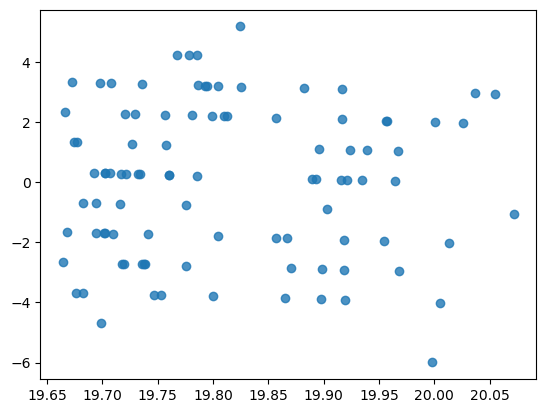

In [13]:
## VERIFICANDO OS RESIDUOS DO MODELO

'''
Analisar os residuos ajuda a verificar tendencias/vies no conjunto de dados

'''

fig, ax = plt.subplots()
ax = sns.regplot(x=modelo.fittedvalues, y=modelo.resid, fit_reg=False)
plt.show()

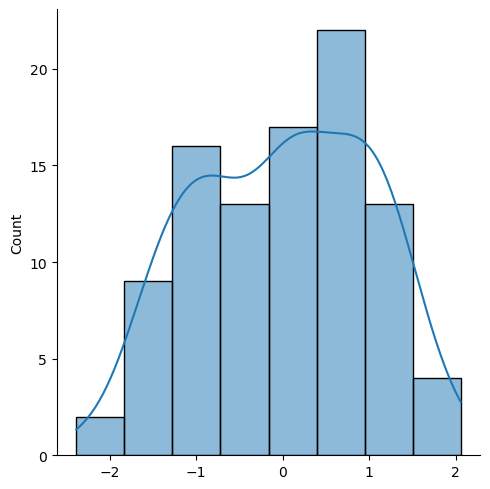

In [17]:
# PLOTAGENS Q-Q
# ajuda a verificar a distribuição dos dados, a maioria dos modelos considera que esta sendo usado a distribuição normal

from scipy import stats

residuos = modelo.resid.copy()
residuos_quadrado = stats.zscore(residuos)

figura = sns.displot(residuos_quadrado, kde=True)
plt.show()